        Принцип открытости/закрытости — принцип ООП, устанавливающий следующее положение: программные сущности (классы, функции и т.д.) должны быть открыты для расширения, но закрыты для изменения.

In [1]:
# пример: хочу из строки текста вытащить все телефонные номера

def is_phone_number(phone):
    groups = phone.split('-')
    if len(groups) != 3:
        return False
    chars = ''.join(groups)
    return all(c.isdigit() for c in chars)

def get_all_numbers(text):
    for c in range(len(text)):
        chunk = text[c:c + 12]
        if is_phone_number(chunk):
            yield chunk

txt = 'Привет всем, мой номер 919-654-8765, а еще у меня есть два дополнительных номера:543-780-0898 и 123-765-8907. Вот и все!'

print(list(get_all_numbers(txt)))

['919-654-8765', '543-780-0898', '123-765-8907']


Очень неэффективно и противоречит ООП: код открыт для изменения и закрыт для расширения, ведь в случае изменения шаблона телефонного номера, код абсолютно неуниверсален и потребует изменений (не расширяется)

### Регулярные выражения
https://stepik.org/lesson/640164/step/1?unit=636683

https://regex101.com/   проверить корректность регулярного выражения

https://pythex.org/ проверить корректность регулярного выражения

https://habr.com/ru/post/349860/

Регулярные выражения (regular expression, regex, регулярка) – это мощный способ обработки текста, позволяющий находить в строках подстроки по сложным условиям.

Чуть более формально, регулярное выражение — это строка, задающая шаблон поиска подстрок в тексте. Одному шаблону может соответствовать много разных строк. Регулярное выражение состоит из обычных символов и специальных командных последовательностей. Например, \d задаёт любую цифру, а \d+ — задает любую последовательность из одной или более цифр.



Сравнение текстов и поиск ошибок

https://textcompare.ru/app

https://text.num2word.ru/

https://prostudio.ru/tools/compare-text/

Популярные шаблоны 

https://stepik.org/lesson/694359/step/1?unit=694140

        Цель применения:

        поиска подстрок в строке
        разделения строки на подстроки
        замены части строки

In [ ]:
# поиск шаблона телефонного номер в тексте

txt = 'Привет всем, мой номер 919-654-8765, а еще у меня есть два дополнительных номера:543-780-0898 и 123-765-8907. Вот и все!'

# шаблон для телефонного номера в регулярке выглядит так : \d{3}-\d{3}-\d{4}

Экранированные последовательности — это последовательности, которые начинаются с символа \, за которым следует один или более символов (\\, \', \", \n, \t и т.д.).

Чтобы написать правильно строку, в которой находятся два символа обратного слэша \\, оба символа надо экранировать, и в итоге получится строка вида \\\\. Вместо экранирования можно использовать сырые (raw) строки, и тогда каждый символ будет восприниматься так, как написан. Сырые строки отличаются от обычных тем, что при создании строки вначале пишется буква r

        Так как в регулярных выражениях часто используется символ обратного слэша \, то рекомендуется использовать сырые строки для описания регулярных выражений. Некоторые выражения правильно отработают и без них, но использование сырых строк для регулярных выражений это хороший тон.

In [2]:
print(r'\\привет мир')
print(r'\\\\')
print(r'\n')
print(r'\t')

\\привет мир
\\\\
\n
\t


Пример совместного использования сырой и f - строки 

In [7]:
a, b = (int(input()) for _ in range(2))

print(fr"{a}\n + \n{b}\n = \n{a+b}")


-5\n + \n5\n = \n0


#### Получить все символы клавиатуры

In [8]:
# получить все символы 

from string import printable

print(printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



##### использование квадратных скобок

In [ ]:

r'[cr1]'     # Найдёт c, r, и 1
r'[cr]at'    # Найдёт слова cat и rat
r'[12]7[56]' # Найдёт 175, 176, 275, 276

# причем От перестановки символов смысл не меняется

In [ ]:
# исключить какие-либо символы из поиска

r'[^12]'  # Найдёт всё, кроме 1 и 2
r'[^12]7' # Найдёт все последовательности, что заканчиваются на 7, и не начинаются на 1 и 2

In [ ]:
# но экранирование или перемещение символа меняет суть 

r'[0^]_[0^]' # Найдёт 0_0, 0_^, ^_0, ^_^
r'[\^0]_[\^0]' # Найдёт 0_0, 0_^, ^_0, ^_^

In [ ]:
r'[0-9]' # То же самое, что и [0123456789]
r'[a-z]' # То же самое, что и [abcdefghijklmnopqrstuvwxyz]
r'[A-Z]' # То же самое, что и [ABCDEFGHIJKLMNOPQRSTUVWXYZ]
r'[а-я]' # То же самое, что и [абвгдежзийклмнопрстуфхцчшщъыьэюя]
r'[А-Я]' # То же самое, что и [АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ]

In [ ]:
# для экранирования дефиса в регулярках
r'[4\-7]' # Найдёт 4, -, и 7
r'[-xz]'  # Найдёт -, x, и z
r'[^-xz]' # Найдёт всё, кроме -, x, и z
r'[BD-]'  # Найдёт B, D, и -


Некоторые спецсимволы, например такие: $^.-[], используются по-разному в регулярных выражениях в зависимости от контекста

In [ ]:
r'[A$Z]'  # Ищет символы A,$,Z
r'^text$' # Ищет text между началом и концом строки
r'100\$'  # Ищет 100$

In [ ]:
r"[^abc]"      # Ищет любой символ, кроме a,b,c
r"^Some text$" # Ищет Some text между началом и концом строки
r"\^"          # Ищет символ ^ 
r"[a^bc]"      # Символ ^ не стоит первым в скобках, поэтому выражение ищет символы a,b,c,^

In [ ]:
r'[A.Z]'     # Ищет символы A,.,Z
r'text.'     # Ищет text с любым символом, кроме перехода на новую строку
r'1\.000\$'  # Ищет 1.000$

In [ ]:
r'Как-то так' # Ищет Как-то так
r'[+-]'       # Ищет символы +,-
r'[^-+]'      # Ищет любой символ, кроме +, -
r'[a-z]'      # Ищет все буквы латинского алфавита в нижнем регистре
r'[a\-z]'     # Ищет символы a,-,z

In [ ]:
r'[abc]'   # Ищет символы a,b,c
r'\[abc\]' # Ищет [abc]
r'[\[abc\]]' # Ищет символы [,a,b,c,]

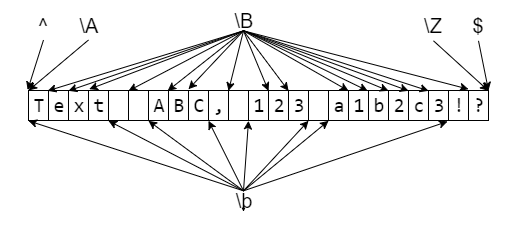

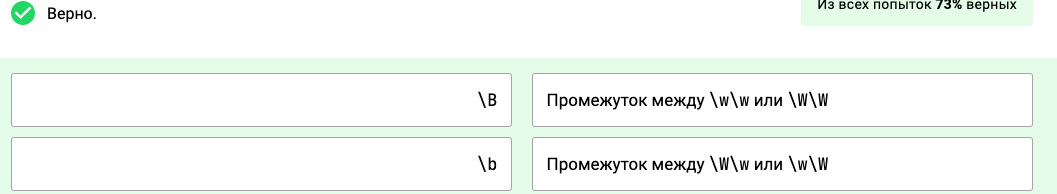

регулярное выражение для поиска пустой строки r"^$"

In [ ]:
# найти последовательность из ЛЮБЫХ 5 символов, кроме перехода на новую строку

reg = r"....."

reg = r".{5}"

In [ ]:
# найти слова из 4 букв в начале строки 

r"^[a-zA-Zа-яА-ЯёЁ]{4}\b"

Шаблоны 

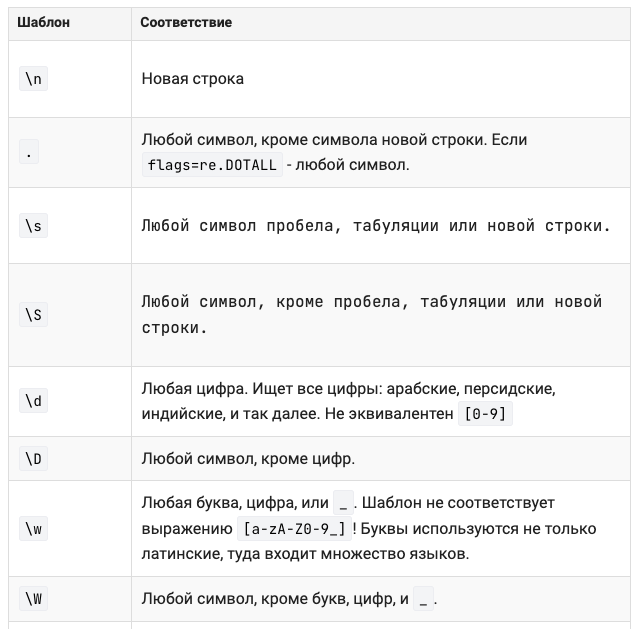
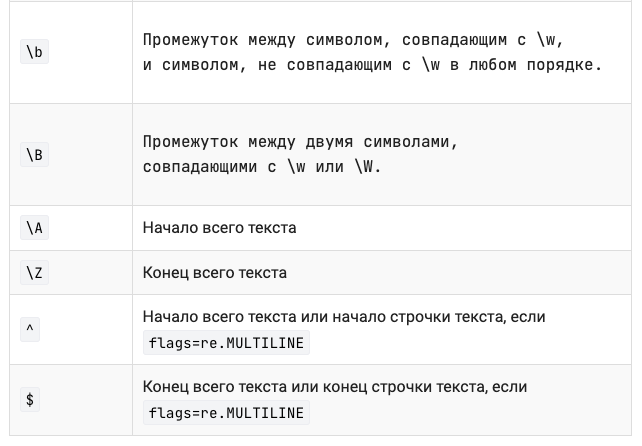


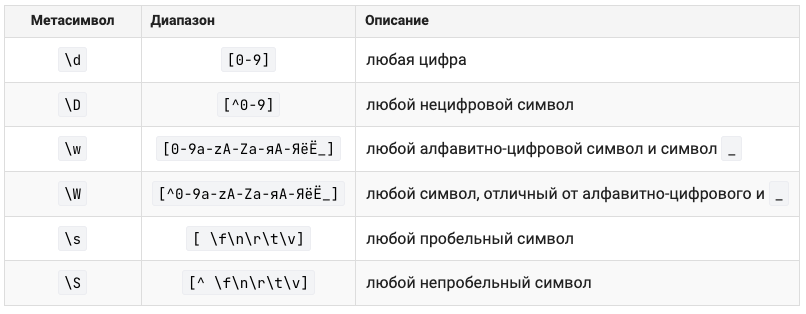

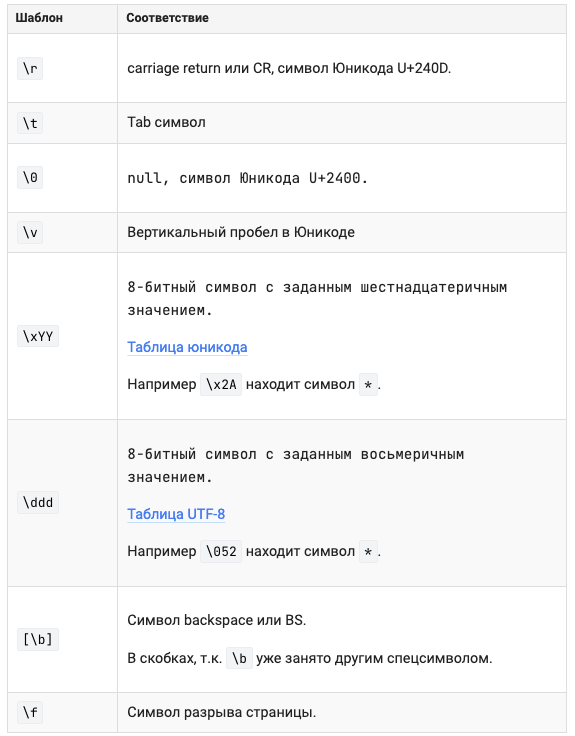

Квантификатор - конструкция, которая позволяет указывать количество повторений.

#### Жадные квантификаторы

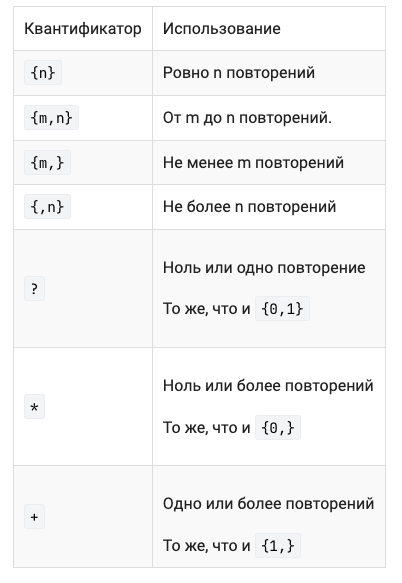

In [ ]:
# найти все аббревиатуры в тексте

reg = r"[A-ZА-Я]{2,}"

In [ ]:
# найти все пары координат в тексте 
r"\b\-?[0-9]{1,3}\.[0-9]* \-?[0-9]{1,3}\.[0-9]*\b"


In [ ]:
# найти все смайлики в тексте

r"[:8;¦=]{1}[\^-]?[|\\0()/PODIC]{1}"

#### Ленивые квантификаторы

Если после квантификатора поставить знак ?, то можно его сделать ленивым. Тогда он будет захватывать минимальное количество символов.

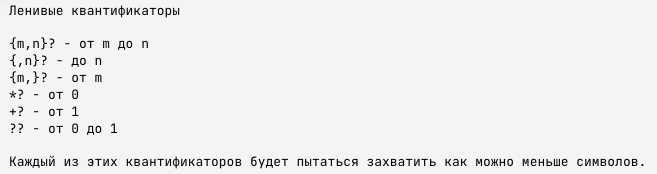

In [ ]:
# найти все фигурные скобки и их содержимое в тексте &{123}++{abcdef}--{789}*

r"{.*?}" # выведет  {123}, {abcdef}, {789}

r"{.*}"# выведет {123}++{abcdef}--{789}

In [ ]:
# найти все четные числа с минимально возможной длиной в текстовой строке
r"[13579]*?[02468]{1}" 

In [ ]:
# найти все последовательности минимальной длины, которые начинаются и кончаются на букву

r"[a-zA-Zа-яёА-ЯЁ]{1}.*?[a-zA-Zа-яёА-ЯЁ]{1}"

#### Группирующие скобки

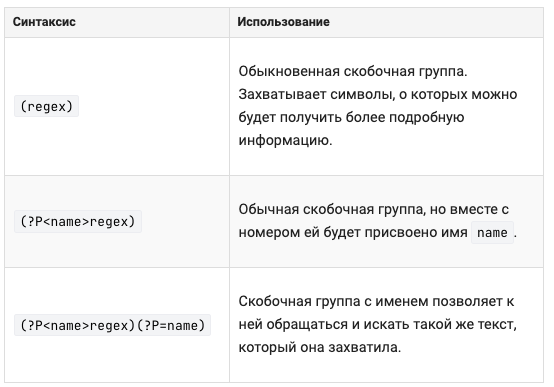

In [ ]:
# найти все слова, которые начинаются и кончаются одинаковыми последовательностями 
# и в промежутке может быть тире: мама, папа, дядя, чуть-чуть

r"\b(?P<same>[а-яё]+)-?(?P=same)\b"

Ссылки на нумерованные группы

Ссылаться можно не только на именованные группы, но и на обычные. Для этого достаточно использовать синтаксис \1, \2, \3, ... и так далее. Цифра после слеша означает номер группы, к которой вы обращаетесь.



In [ ]:
r"([a-z]{4})\1" # в зависимости от цифры в конце можно будет сослаться на какую-либо из групп

In [ ]:
# найти все повторяющиеся два раза буквы в слове

r"([а-яёa-zA-ZА-ЯЁ])\1"

#### Условие (?(n)yes|no)
В регулярных выражениях существуют условия. Если у группы n нашлись совпадения - возвращается шаблон до |. В противном случае возвращается шаблон после |. Шаблон после | необязателен и может быть опущен.

In [ ]:
# удобно для поиска содержимого в скобках или без них

regex = r"^(\[)?\d(?(1)\]|)$" # Выражение для поиска цифры в скобках или без скобок

# Группа (\[)? ищет первую скобку. К группе применён квантификатор ?, т.к. скобки может и не быть
# Условие (?(1)\]|) ищет правую скобку, если в первой группе найдена левая скобка.
# Если первая группа ничего не нашла, то условие ничего не ищет.

# Найдёт 1 и [2]
# Проигнорирует 3] и [4

#### Comment group
(?#) - скобочное выражение, позволяющее написать комментарий в регулярном выражении:

#### Non-capturing group
https://stepik.org/lesson/694365/step/2?unit=694145

(?:) - скобочное выражение, которое группирует регулярное выражение, но не захватывает в его группу. Так и называется - Non-capturing group, т.е. группа без захвата.

        в Python группы имеет смысл использовать только тогда, когда вы к ним обращаетесь или работаете с их данными. Во всех остальных случаях нужно использовать Non-capturing group

#### Lookahead и Lookbehind
Очень полезные скобочные группы, которые позволяют "смотреть" что находится сзади и спереди регулярных выражений. Часто используются, когда нужно найти текст или какую-то последовательность между символами, которые не нужно захватывать в регулярное выражение.

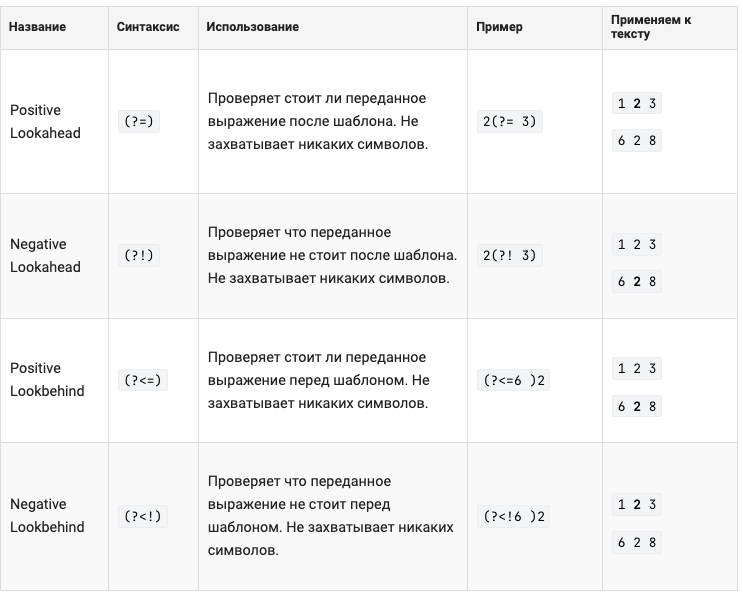

 все выражения в lookbehind должны быть фиксированной ширины, иначе вы получите ошибку re.error: look-behind requires fixed-width pattern.

In [ ]:
# Вызовут ошибку:

r'(?<=test{0,})regex'
r'(?<=g?)regex'
r'(?<!Python+)regex'

# Длина вхождений выражений в Lookbehind может быть разной
# Поэтому появится ошибка



# Ошибки не будет:

r'(?<=test)regex'
r'(?<=g{21})regex'
r'(?<!Pytho[mn])regex'

# Длина вхождений выражений в Lookbehind фиксированная
# Всё выполнится без ошибок

In [ ]:
# найти в тексте все слова, являющиеся именами или названиями: 
# - это НЕ НАЧАЛО всего текста (?<!\A) - отрицание начала текста 
# - это НЕ НАЧАЛО предложения (?<![!.?] ) - отрицание наличия завершающего знака препинания и пробела перед искомым словом

r"(?<!\A)(?<!([!.?] ))[А-ЯЁ][а-яё]+"

In [ ]:
# найти все неотрицательные числа в последовательности

r"(?<!\-)(?<![0-9])[0-9]+(?=\b)"

#### Операция или
Синтаксис регулярных выражений позволяет писать такие выражения, которые найдут нужные строки при соответствии их хотя бы одному из выражений.

Например, выражение:

r'Привет|Пока'
найдёт все слова Привет и Пока в тексте.

- Если использовать оператор или в скобочных выражениях или группах, то он не затронет символы извне.



        символ | в регулярных выражениях выполняет роль логического ИЛИ, т.е. разделяет шаблоны, а не соседние символы. Для поиска в определённом месте одного из заданных символов используются квадратные скобки

Оператор "Или" в lookbehind
Обратите внимание, что в lookbehind можно использовать |, только если все шаблоны одинаковой длины. То есть такие выражения будут правильными:

In [ ]:
r"(?<=hi!|bye)"     # длина выражений по 3 символа
r"(?<![abcdef]|\d)"    # длина выражений 1 символ
r"(?<=\w|\W|\s)"    # длина выражений 1 символ

Такая реализация вызовет ошибку, тк они разной длины:

(?<=hi!|long_text)

(?<![abcdef]|\d{4})

(?<=\w\s|\W)

Во избежание исключения нужно использовать | в non-capturing group:

In [ ]:
# обход исключения re.error: look-behind requires fixed-width pattern

r"(?:(?<=hi!)|(?<=long_text))"
r"(?:(?<![abcdef])|(?<!\d{4}))"
r"(?:(?<=\w\s)|(?<=\W))"

Оператор "Или" в квадратных скобках


In [12]:
# Задача: Нужно найти слово Hi или Bye

wrong_regex = r'[Hi|Bye]'
# Неправильное регулярное выражение, т.к. оно равносильно следующему выражению [BHeiy|]
# Квадратные скобки используются только для замены символов, условие или в них не работает

correct_regex = r'(Hi|Bye)'
# Поставленную выше задачу решает

correct_regex2 = r'(?:Hi|Bye)'
# Non-capturing group идеально подходит для группировки шаблонов

correct_regex3 = r'Hi|Bye'
# Шаблон без групппировки. Также работает, поставленную выше задачу решает

        BTC кошельки
        Условие:
        Криптостример Григорий отмывает грязные деньги через миксеры, а также через пару своих кошельков. Но вот незадача, он потерял адрес своего биткоин кошелька, на который должны прийти все монеты. Помогите Грише. Напишите регулярное выражение, которое найдёт все адреса биткоин кошельков.

        Что нужно найти:
        Адрес представляет собой набор из префикса (1, или 3, или bc1) и основной части длиной от 27 до 34 символов.

        В основной части используются:

        Весь латинский алфавит, кроме: O, I, l.
        Все арабские цифры, кроме 0.


In [ ]:
r"(?:\b(1|3|bc1)[1-9a-km-zA-HJ-NP-Z]{27,34}\b)"

# исключать буквы из последовательности можно так
r'\b(?:1|3|bc1)(?:(?![OIl0])[a-zA-Z\d]){27,34}\b'

пояснения к коду выше:

1) расположение условия слева от квадратных скобок указывает на то, что оно применяется и к более ранней части выражения, то есть к (?:1|3|bc1). 

2) Если расположить негативную проверку справа от скобок, то регулярка начнёт захватывать последовательности, в которых сразу после (?:1|3|bc1) идёт один из запрещённых символов.

Применение группы условия на примере задачи "готов"

In [ ]:
# мое длинное решение
r"(?:(он готов\b))|(?:(они|мы|вы) готовы)|(она готова)|((ты|я) (готова|готов\b))"

# решение с несколькими группами условий
r"(?:(мы|вы|они)|(я|ты)|(она)|(он)) готов(?(1)ы|(?(2)а?|(?(3)а|)))\b"

# первая БОЛЬШАЯ группа - делаем non-captured (ненумерованной) 
# к остальным обращаемся по условиям:
# - если нашли совпадение в первой группе (мы,вы,они) - берем окончание ы 
# - или если нашли совпадение в 2 группе - берем окончание а которое повторяется 0 или 1 раз (для ты готова/ты готов)
# - или если третья группа (она) - берем окончание а
# - в случае 4 группы (он) никаких окончаний не надо, только пробел или другой символ (главное, не буква!) 

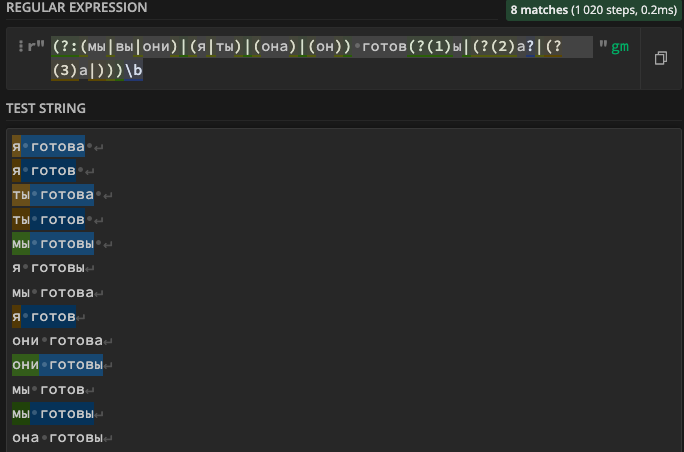

Разница между захватом ВМЕСТЕ с шаблоном 

(?:(Номер|Number|№)) [0-9]{3}\b

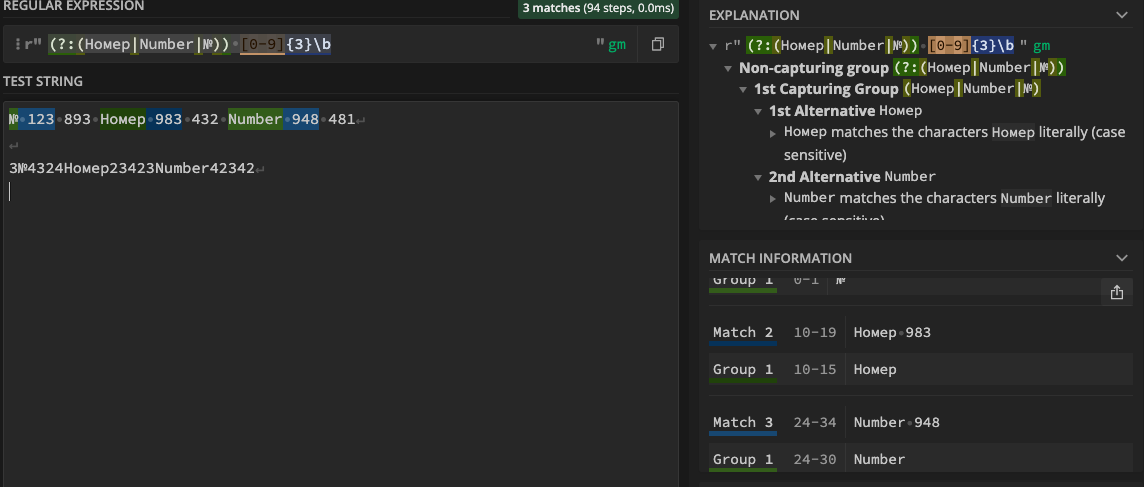

и БЕЗ НЕГО

(?:(?<=Номер )|(?<=Number )|(?<=№ ))[0-9]{3}

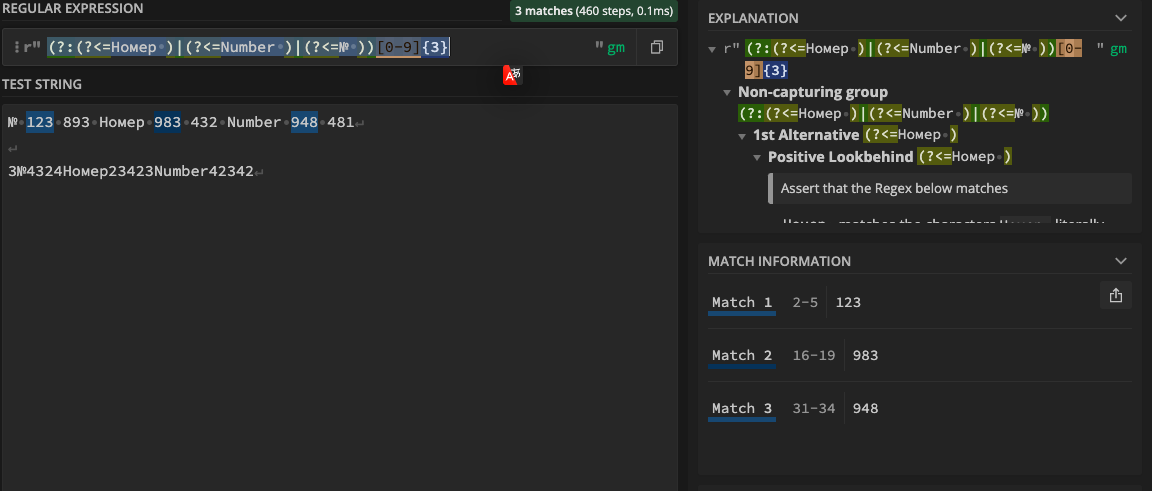

Найти все числа от 0 до 1 включительно

дроби типа 0.02 принимаются только, если их дробная часть состоит из двух знаков

In [ ]:
r'(?:\b[01](?![0-9\.]))|(?:\b0\.[0-9]{1,2}\b)'

# - отдельно условие на поиск 0 и 1 
# - отдельно условие на поиск 0 с дробной частью

In [ ]:
# найти слова, содержащие букву а 
regex = r"(?:\bа[а-яёА-Яё]+\b)|(?:\b[а-яёА-Яё]+а+[а-яёА-Яё]+\b)|(?:\b[а-яёА-Яё]+а\b)|\bа\b"

regex = r"\b[а-яА-ЯёЁ]*а[а-яА-ЯёЁ]*\b"

найти все слова на русском, в которых есть хоть один инородный символ (другой язык или цифра)

In [ ]:
# найти все слова на русском, в которых есть хоть один инородный символ (другой язык или цифра)

regex = r"(?:\b(\d+[a-zA-Zа-яА-ЯёЁ\d]+))|(?:\b([a-zA-Z]+[^a-zA-Z\.,:?!; ]+))|(?:\b([а-яА-ЯёЁ]+[^а-яА-ЯёЁ\.,:?!; ]+\w*))|(?:((\$|[^a-zA-Zа-яА-Я\.,:?!; \n]+)[а-яА-Яa-zA-Z\d]+\w*))"

regex = r"\$?[А-Яа-яЁё]*[^А-Яа-яЁёAB ]+\w*\b"


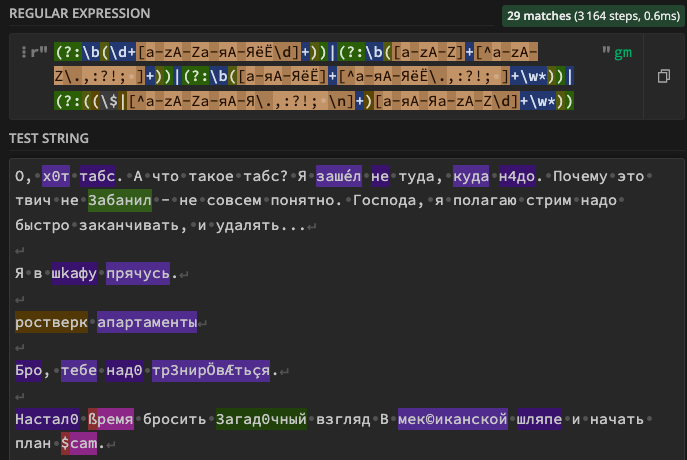

Решение ниже даст недостаточные результаты

\b(?:([а-яА-ЯёЁ]+)|([a-zA-Z]+))(?(1)[^а-яА-ЯёЁ\.,:?!; ]+[а-яА-ЯёЁ]*|[^a-zA-Z\.,:?!; ]+[a-zA-Z]*)

(?:\b(\d+[a-zA-Zа-яА-ЯёЁ]+))|(?:\b([a-zA-Z][\dа-яА-ЯёЁ]+))|(?:\b([а-яА-ЯёЁ][^а-яА-ЯёЁ\.,:?!; ]+\w*))

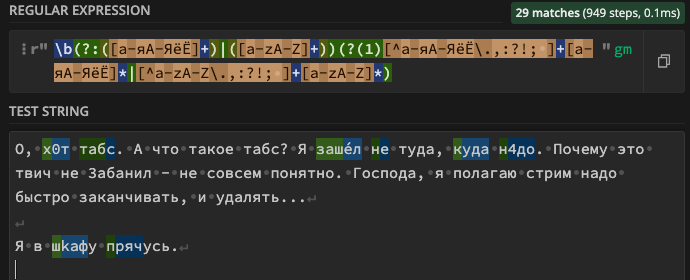

        В начале было слово...
        Условие:
        Напишите регулярное выражение, которое найдёт первое слово в тексте.

        Что нужно найти:
        Нужно найти последовательности, подходящие по следующим условиям:

        Используются буквы кириллического алфавита верхнего и нижнего регистров
        В последовательности может содержаться дефис
        Последовательность стоит в начале строки, если её нет - первого слова нет

In [ ]:
# найти первое слово в тексте - использовать поиск по положению каретки
regex = r"^[а-яА-Я-]+"

Найти все ники, удовлетворяющие условиям: валидация

- от 5 до 32 символов
- только англ буквы, цифры и _
- не начинается на цифру или _
- не кончается на _


In [ ]:
regex = r"(?<!\S)[a-zA-Z][a-zA-Z0-9_]{3,30}[a-zA-Z0-9](?!\S)"

Важно понимать разницу

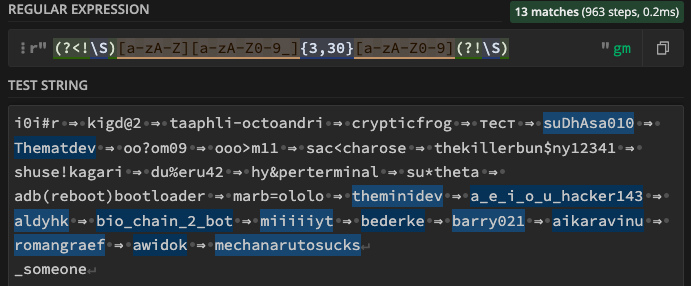

и этим 

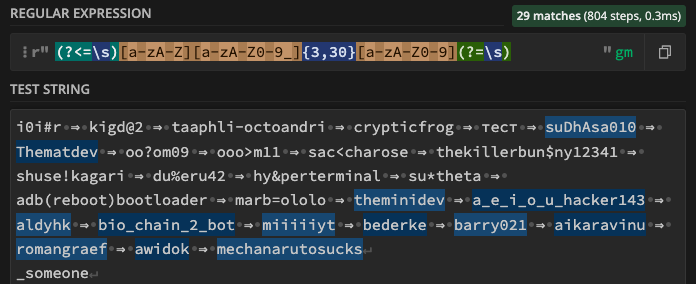

        файл с расширением

        Нужно найти последовательности, подходящие по следующим условиям:

        Название файла состоит из: букв латинского алфавита верхнего и нижнего регистров, цифр, -
        Между названием и расширением файла стоит .
        Расширение файла состоит из букв латинского алфавита верхнего и нижнего регистров, цифр
        Минимальная длина названия и расширения - один символ
        Найденная последовательность может являться подпоследовательностью, только если стоит в абсолютном или относительном пути: C:\Users\test.txt, ../Users/test.txt, т.е. перед ней стоят символы / или \

In [36]:
regex = r"(?:(?<=\\)|(?<=/)|(?<!\S))[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+"


        Найти все числа в скобках (или пустые скобки), внутри которых числа разделены запятыми

        Начинается с [ и заканчиваются на ]
        Внутри может быть пусто, а могут находиться числа
        Числом считаем произвольную последовательность из цифр
        Между числами должны стоять запятые
        Запятые могут быть как и с пробелом, так и без
        После последнего числа может стоять запятая, т.к. такие массивы: [123, 123, ] и [23, ] валидные в Python

In [37]:
regex = r"\[(?:([0-9]+(,)?(?(2) ?[0-9]*|))+|)\]"

#### catastrophic backtracking

Если совпадений нет, то движок возвращается к предыдущим позициям, где снова начинает поиск. Движок регулярных выражений пытается сделать это много раз, пока не исследует все возможные пути.

In [ ]:
import re

# Запустим выражение на строке из 20 символов a:
re.findall(r"(a+)+b", "a" * 20) 
# Выполнилось за 0.07218690006993711

# Запустим выражение на строке из 30 символов a:
re.findall(r"(a+)+b", "a" * 30) 
# Выполнилось за 75.4667053000303

# Прирост более чем в тысячу раз!!!

#### Регулярные выражения, которые попадают под catastrophic backtracking:
Если к группе применён квантификатор и внутри этой группы используется ещё один квантификатор или |, то регулярное выражение может быть неконтролируемым.

Примеры таких выражений:

- (?:a+)+

- ([a-zA-Z_]+)*

- (?:a|aa)+

- (a|a?)+


#### Что делать если в выражении есть catastrophic backtracking?
Есть следующие способы решить эту проблему:

1) Постараться переписать регулярное выражение, если это возможно (сократить количество квантификаторов и условий или)

2) Перед использованием выражения проверять входные данные (например, не принимать слишком большой текст)

3) Использовать специальные средства из модуля re (сейчас мы их пройдём)

4) Контролировать использование регулярного выражения (например, останавливать поиск, если он идёт слишком долго)

#### Притяжательные квантификаторы 🆕
Если после жадного квантификатора поставить +, то он станет притяжательным:

        {m,n}+
        {,n}+
        {m,}+
        *+
        ++
        ?+

Притяжательные квантификаторы, как и жадные, пытаются найти максимально возможное количество вхождений. Но, в отличие от жадных квантификаторов, они не разрешают back-tracking, когда регулярное выражение не может найти совпадение.

Это значит, что движок не будет проходить огромное количество путей и закончит свою работу раньше, если совпадение не будет найдено.

#### Атомарная группировка 🆕
Второе решение проблемы с catastrophic backtracking - атомарная группировка:

        (?>regex)

Пытается найти вхождения regex, как если бы оно было отдельным регулярным выражением. Если совпадения найдены - движок регулярных выражений пытается найти совпадения для оставшейся части регулярного выражения, следующего после атомарной группировки. Если совпадений нет - движок регулярных выражения может откатиться назад только на место до атомарной группировки.

С помощью атомарной группировки можно сказать движку, что откатываться в этом месте и искать всевозможные пути не имеет смысла: внутри (?>regex) откат запрещён.

Например, выражение (?>.*). никогда не найдёт совпадений, потому что шаблон .* нашёл бы все возможные символы в тексте, и оставшаяся . не смогла бы найти совпадение.

- x{m,n}+ одно и то же, что и (?>x{m,n})

- x*+ одно и то же, что и (?>x*)

- x++ одно и то же, что и (?>x+)

- x?+ одно и то же, что и (?>x?)

In [4]:
import re

regex = r'(?>a+)+b'     # правильная запись

# regex = r'(?:a+)+b'     # вызовет catastrophic backtracking - будет обрабатываться очень долго

print(re.findall(regex, 'a'*50))

[]


In [20]:
import re
regex = r"(?:7\-\d{3}\-\d{3}\-\d{2}\-\d{2})|(?:8\-\d{3}\-\d{4}\-\d{4})"
tests = ['Перезвони мне, пожалуйста: 7-919-667-21-19',
         'Артур: +7-919-667-21-19, Анри: 7-hey-anri-anri, Тимур: 8-917-4864-1911']

print(*(phone_num for test in tests for phone_num in re.findall(regex, test) ), sep='\n\n')

7-919-667-21-19

7-919-667-21-19

8-917-4864-1911


In [18]:
import re
regex = r"(?:7\-\d{3}\-\d{3}\-\d{2}\-\d{2})|(?:8\-\d{3}\-\d{4}\-\d{4})"
#test = 'Перезвони мне, пожалуйста: 7-919-667-21-19'

test = 'Артур: +7-919-667-21-19, Анри: 7-hey-anri-anri, Тимур: 8-917-4864-1911'
print(*re.findall(regex, test))

7-919-667-21-19 8-917-4864-1911


In [ ]:
# поймать ВСЕ форматы даты в тексте

regex = r"((?:\d{4}|\d{2})(?:\.|\/|)){3}"

# будь осторожен, регулярка поймает буквально ВСЕ форматы даты, а бывает, что нужны только подходящие под формат

In [ ]:
# поймать только определенные форматы даты (используются в python)

regex = r"(?:(\d{4})|(\d{2}))(?(1)(?:(\.)|(/))\d{2}(?(3)\.|/)\d{2}|(?:(\.)|(/))\d{2}(?(5)\.|/)\d{4})"

In [27]:
''.join([chr(i) for i in range(ord('A'), ord('Z')+1) if chr(i) not in 'CIKMOV'])

'ABDEFGHJLNPQRSTUWXYZ'

In [ ]:
# найти все варианты ip-адреса 
regex = r"(((\d{1,2})|(1\d{2})|(2[0-4]\d)|(25[0-5]))\.){3}\d{1,3}"

In [28]:
# найти слова с повтоярющимися буквами

regex = r'\b\w*(\w)\w*\1\w*\b'


In [29]:
# найти последовательности из 8 цифр, разделенных по две цифры одним из четырех видов разделителей 
# просто - 
# --- 
# просто точка . 
# либо ничего (пустота)

regex = r'\d{2}((-|---|\.)?)\d{2}\1\d{2}\1\d{2}'

regex = r'\b\d{2}(?:(-)|(---)|(\.)|())(\d{2}(?:(?(4))(?(1)-)(?(2)---)|(?(3)\.))){2}\d{2}\b'


In [ ]:
# найти все повторяющиеся подряд слова

regex = r'\b(\w+)\W+\1\b'


#### Модуль re для поиска регулярных выражений

Функция search()

Функция search() сканирует строку в поисках **ПЕРВОГО** совпадения с регулярным выражением и возвращает специальный объект соответствия (тип Match) или значение None, если ни одна позиция в строке не соответствует регулярному выражению. 

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    flags=0 — один или несколько флагов (необязательный аргумент)

In [34]:
from re import search

match1 = search('super', 'superstition')
match2 = search('super', 'insuperable')
match3 = search('super', 'without')
match4 = search('\d+', 'foo123bar')

match5 = search('super', 'insuperable super')   # найдет только ПЕРВОЕ совпадение


print(match1)
print(match2)
print(match3)
print(match4)
print(match5)

<re.Match object; span=(0, 5), match='super'>
<re.Match object; span=(2, 7), match='super'>
None
<re.Match object; span=(3, 6), match='123'>
<re.Match object; span=(2, 7), match='super'>


Функция match()

Функция match() возвращает специальный объект соответствия (тип Match), если **НАЧАЛО СТРОКИ** соответствуют регулярному выражению, или значение None в противном случае.

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    flags=0 — один или несколько флагов (необязательный аргумент)

In [33]:
from re import match

match1 = match('super', 'superstition')
match2 = match('super', 'insuperable')
match3 = match('super', 'superstition super')   # найдет только совпадение в НАЧАЛЕ строки

print(match1)
print(match2)
print(match3)

<re.Match object; span=(0, 5), match='super'>
None
<re.Match object; span=(0, 5), match='super'>


Функция fullmatch()

Функция fullmatch() возвращает специальный объект соответствия (тип Match), если **ВСЯ СТРОКА** соответствует регулярному выражению, или значение None в противном случае.

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    flags=0 — один или несколько флагов (необязательный аргумент)


In [35]:
from re import fullmatch

match1 = fullmatch('\d+', '123foo')
match2 = fullmatch('\d+', 'foo123')
match3 = fullmatch('\d+', 'foo123bar')
match4 = fullmatch('\d+', '123')            # равносильно выражению search('^\d+$', '123') с указанием нач и конца строки

print(match1)
print(match2)
print(match3)
print(match4)

None
None
None
<re.Match object; span=(0, 3), match='123'>


        Объекты типа MATCH приводятся к типу bool автоматически

In [64]:
from re import search, fullmatch

match = fullmatch('\d{3}-\d{3}-\d{4}', '777-888-1234')

if match:                                       # возвращает True 
    print('Строка соответствует формату.')
    print(match)
else:
    print('Строка не соответствует формату.')

print(bool(match))

Строка соответствует формату.
<re.Match object; span=(0, 12), match='777-888-1234'>
True


#### Методы формата MATCH
Метод group() возвращает одну или несколько подгрупп совпадения. Если метод вызывается без аргументов, то возвращается вся подстрока, которая совпала с шаблоном регулярного выражения.

In [37]:
from re import search

match = search('(\w+),(\w+),(\w+)', 'foo,bar,baz')

print(match.group())                       # вся строка - равнозначент group(0)
print(match.group(0))                      # вся строка
print(match.group(1))                      # подгруппа
print(match.group(2))                      # подгруппа
print(match.group(3))                      # подгруппа
print(match.group(1, 2, 3))                # кортеж

# print(match.group(4)) - вызовет исключение

foo,bar,baz
foo,bar,baz
foo
bar
baz
('foo', 'bar', 'baz')


In [38]:
# можно вызывать группы какое угодно число раз
from re import search

match = search('(\w+),(\w+),(\w+)', 'foo,bar,baz')

print(match.group(1, 2, 3, 1, 2, 2, 3, 3, 3, 3))

('foo', 'bar', 'baz', 'foo', 'bar', 'bar', 'baz', 'baz', 'baz', 'baz')


In [39]:
# можно вызывать и именованные группы
from re import search

match = search('(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,bar,baz')

print(match.group())
print(match.group('w1'))
print(match.group('w2'))
print(match.group('w3'))
print(match.group('w1', 'w2', 'w3', 'w2', 'w3'))

foo,bar,baz
foo
bar
baz
('foo', 'bar', 'baz', 'bar', 'baz')


Метод groups() возвращает кортеж, содержащий все захваченные группы.

In [41]:
from re import search

match = search('(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.groups())

# ечли нужно аргумент None превратить в кортеже в иное значение, то используй аргумент default
print(match.groups(default='----'))         # именованный аргумент
print(match.groups(default=False))

('foo', 'bar', None)
('foo', 'bar', '----')
('foo', 'bar', False)


Метод groupdict() возвращает словарь, содержащий все захваченные именованные группы.



In [45]:
from re import search

match = search('(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)?', 'foo,bar,')

print(match.groupdict())

# с аргументом default
print(match.groupdict(default=''))
print(match.groupdict(default='----'))

{'w1': 'foo', 'w2': 'bar', 'w3': None}
{'w1': 'foo', 'w2': 'bar', 'w3': ''}
{'w1': 'foo', 'w2': 'bar', 'w3': '----'}


Методы start() и end() возвращают индексы начала и конца подстроки, которая совпала с регулярным выражением.


In [46]:
from re import search

match = search('\d+', 'foo123bar456baz')

print(match)
print(match.start())
print(match.end())

<re.Match object; span=(3, 6), match='123'>
3
6


In [47]:
# второй способ получить подстроку с совпадением регулярного выражения

from re import search

text = 'foo123bar456baz'

match = search('\d+', text)

start = match.start()
end = match.end()

print(match)
print(text[start:end])
print(match.group())           # аналогично предыдущей строке

<re.Match object; span=(3, 6), match='123'>
123
123


In [48]:
# в аргументы можно передавать имя или номер группы
from re import search

text = 'foo123bar456baz'

match = search('(\d+)\D+(?P<num>\d+)', text)

print(match)
print(match.group(), match.start(), match.end())
print(match.group(1), match.start(1), match.end(1))
print(match.group('num'), match.start('num'), match.end('num'))

<re.Match object; span=(3, 12), match='123bar456'>
123bar456 3 12
123 3 6
456 9 12


In [49]:
# если регулярное выражение содержит группу, не участвующую в сопоставлении. В этом случае оба метода вернут значение −1

from re import search

match = search('(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.group(3))
print(match.start(3), match.end(3))

None
-1 -1


Метод span() возвращает индексы начала и конца подстроки в виде кортежа, которая совпала с регулярным выражением. В метод span() также можно передать номер или название группы. В этом случае метод вернет индексы начала и конца подстроки в виде кортежа, совпадающей с нужной группой.

равнозначен (start(), end())

In [52]:
from re import search

match = search('(\d+)\D+(?P<num>\d+)', 'foo123bar456baz')

print(match)
print(match.span())
print(match.span(1))
print(match.span('num'))

print((match.start(),match.end()))

<re.Match object; span=(3, 12), match='123bar456'>
(3, 12)
(3, 6)
(9, 12)
(3, 12)


### Задачи 

        Телефонные номера
        Вам доступен набор телефонных номеров, имеющих следующие форматы:

        <код страны>-<код города>-<номер>
        <код страны> <код города> <номер>

        в котором код страны и код города представлены последовательностями от одной до трех цифр включительно, а номер — последовательностью от четырех до десяти цифр включительно. Между кодом страны, кодом города и номером используется разделитель, которым служит либо символ дефис, либо пробел, причем одновременно оба вида разделителя в одном номере присутствовать не могут.

        Программа должна для каждого введенного телефонного номера вывести отдельно его код страны, код города и номер в следующем формате:

    Код страны: <код страны>, Код города: <код города>, Номер: <номер>

In [ ]:
import re
from sys import stdin
regex = r"(\d{1,3})[ -](\d{1,3})[ -](\d{4,10})"

numbers_for_check = (line.strip() for line in stdin.readlines())

def get_string(string, regex):
    m_obj = re.search(regex, string)
    country_code, city_code, num = m_obj.groups()
    return f'Код страны: {country_code}, Код города: {city_code}, Номер: {num} '

print(*(get_string(number, regex) for number in numbers_for_check))

In [61]:
'Код страны: 1, Код города: 877, Номер: 2638277\nКод страны: 91, Код города: 011, Номер: 23413627' ==\
'Код страны: 1, Код города: 877, Номер: 2638277\nКод страны: 91, Код города: 011, Номер: 23413627'

True

        Онлайн-школа BEEGEEK
        В онлайн-школе BEEGEEK логин учетной записи определяется следующим образом:

        первым символом является символ нижнего подчеркивания _
        затем следуют одна или более цифр
        после записываются ноль или более латинских букв в произвольном регистре
        логин может иметь на конце необязательный символ нижнего подчеркивания _
        Напишите программу, которая принимает произвольное количество строк и определяет, какие из них представляют собой корректный логин онлайн-школы BEEGEEK.

        Формат входных данных
        На вход программе подаётся произвольное количество строк, каждая из которых содержит набор произвольных символов.

        Формат выходных данных
        Программа должна для каждой введенной строки вывести True, если она представляет собой корректный логин онлайн-школы BEEGEEK, или False в противном случае.

In [ ]:
import re
from sys import stdin
regex = r"_\d+[a-zA-Z]*_?\b"

logins_for_check = (line.strip() for line in stdin.readlines())

print(*(bool(re.match(regex,login)) for login in logins_for_check), sep='\n')


Найти слова с повторяющимися слогами

In [ ]:
import re
regex = r"\b\w*(\w+)\1\w*\b"

words_for_check = (line.strip() for line in stdin.readlines())

print(*(re.match(regex,word).group() for word in words_for_check), sep='\n')

        Задача на поиск строк, в которых совпадают первый шаблон, или второй шаблон, или первый и второй шаблоны

https://stepik.org/lesson/680263/step/12?unit=678921

In [76]:
import re
from sys import stdin
#regex = r"(bee).*\1|(\bgeek\b)"
#string = 'beegeek'
string = 'bee geek bee'

regex1 = r"(bee).*\1"
regex2 = r"(\bgeek\b)"

print(int(bool(re.search(regex1, string).group(1))))
print(int(bool(re.search(regex2, string).group(1))))

1
1


In [85]:
match = search(r"(bee).*\1|(\bgeek\b)", 'bee geek ')
print(match.groups())

match = search(r"(bee).*\1|(\bgeek\b)", 'bee geek bee')
print(match.groups())

match = search(r"(bee).*\1|(\bgeek\b)", 'bee bee bee ')
print(match.groups())

(None, 'geek')
('bee', None)
('bee', None)


In [ ]:
import re
from sys import stdin

strings_for_check = (line.strip() for line in stdin.readlines())

def count_True(re1,re2,string):
    m1_obj = re.search(re1, string)
    m2_obj = re.search(re2, string)
    if m1_obj: count1=1
    else: count1=0
    if m2_obj: count2=1
    else: count2=0
    return count1,count2

regex1 = r"(bee).*\1"
regex2 = r"(\bgeek\b)"

res_counter = [count_True(regex1,regex2,string) for string in strings_for_check]

print(sum(map(lambda x: x[0], res_counter)))
print(sum(map(lambda x: x[1], res_counter)))


In [91]:
a= iter([(1,2), (3,4), (5,6)])
print(list(map(lambda x: x[1], a)))
print(list(map(lambda x: x[0], a)))

[2, 4, 6]
[]


        Популярность
        В онлайн-школе BEEGEEK мы всегда следим за тем, насколько растет наша популярность. Для этого мы собираем публикации из различных соцсетей, которые содержат вхождения строки beegeek в нижнем регистре. Мы оцениваем публикацию:


        3 балла, если она начинается и заканчивается строкой beegeek

        2 балла, если она только начинается или только заканчивается строкой beegeek

        1 балл, если она содержит строку beegeek только внутри

        0 баллов, если она не содержит строку beegeek
        Напишите программу, которая определяет популярность онлайн-школы BEEGEEK путем суммирования баллов всех публикаций.

        Формат входных данных
        На вход программе подается произвольное число строк, каждая из которых представляет очередную публикацию.

        Формат выходных данных
        Программа должна определить, во сколько баллов оценивается каждая введенная публикация, и вывести сумму всех полученных баллов.

        Примечание 1. Если публикация представляет собой просто строку beegeek, то она оценивается в 2 балла.

In [ ]:
import re
from sys import stdin

re1= r"^beegeek.*beegeek$"                          # 3 балла
#re2 = r"^beegeek[^beegeek]*$|^[^beegeek]+beegeek$"  # 2 балла 
re2_1 = r"^beegeek(?!.*beegeek$).*"
re2_2 = r"^(?!beegeek).*beegeek$"
re3 = r".+beegeek.+"                                # 1 балл 

three = two = one = res =0

for line in stdin:
    line = line.strip()
    if re.search(re1, line): three+=1
    elif re.search(re2_1, line) or re.search(re2_2, line): two+=2
    elif re.search(re3, line): one+=1
    res +=sum(three,two,one)
    three = two = one = 0

print(res)

In [9]:
import re
from sys import stdin

re1= r"^beegeek.*beegeek$"                          # 3 балла
#re2 = r"^beegeek[^beegeek]*$|^[^beegeek]+beegeek$"  # 2 балла 
re2_1 = r"^beegeek(?!.*beegeek$).*"
re2_2 = r"^(?!beegeek).*beegeek$"
re3 = r".+beegeek.+"                                # 1 балл 

#strings_for_check = (line.strip() for line in stdin.readlines())

three = two = one = res = 0

data = 'hi, beegeek\nbeegeek is an awesome place for programmers\nbeegeek rocks, rocks beegeek\ni think beegeek is a great place to hangout'.split('\n')
for line in data:
    line = line.strip()
    if re.search(re1, line): three+=3
    elif re.search(re2_1, line) or re.search(re2_2, line): two+=2
    elif re.search(re3, line): one+=1
    res += sum((three,two,one))
    print(three,two, one)
    three = two = one = 0
    

print(res)

0 2 0
0 2 0
3 0 0
0 0 1
8


#### Флаги 

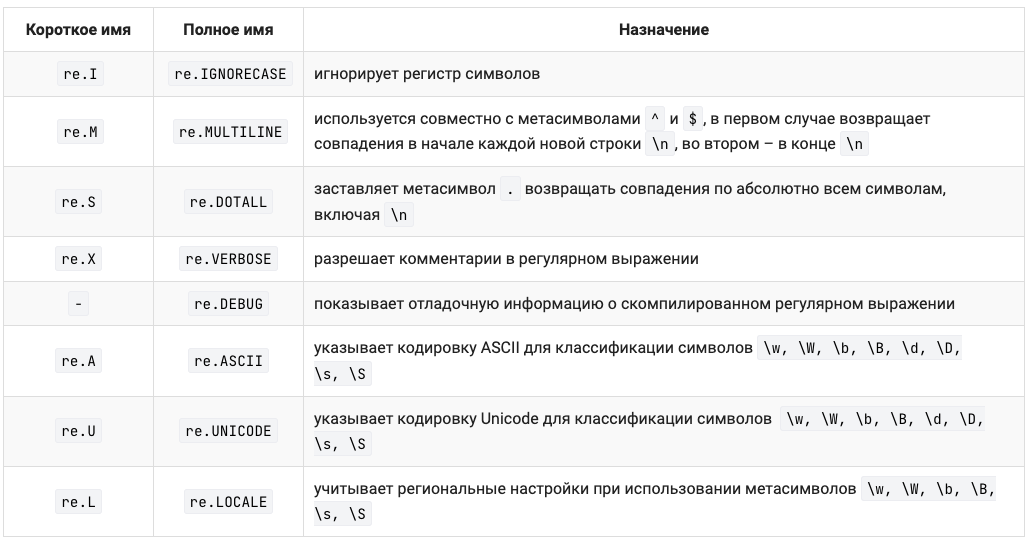

In [10]:
# игнорировать регистр 

import re

match1 = re.search('a+', 'aaaAAA')
match2 = re.search('A+', 'aaaAAA')
match3 = re.search('a+', 'aaaAAA', re.IGNORECASE)
match4 = re.search('A+', 'aaaAAA', re.I)

print(match1)
print(match2)
print(match3)
print(match4)

<re.Match object; span=(0, 3), match='aaa'>
<re.Match object; span=(3, 6), match='AAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>


In [11]:
# метасимволы ^ и $ совпадают только с началом и концом всей строки, не учитывая наличие в строке символов \n

# изменить поведение, можно применив флаг: поиск соответствий, учитывая перенос на новую строку

import re

text = 'foo\nbar\nbaz'

print(re.search('^foo', text, re.MULTILINE))
print(re.search('^bar', text, re.MULTILINE))
print(re.search('^baz', text, re.MULTILINE))
print(re.search('foo$', text, re.M))
print(re.search('bar$', text, re.M))
print(re.search('baz$', text, re.M))

<re.Match object; span=(0, 3), match='foo'>
<re.Match object; span=(4, 7), match='bar'>
<re.Match object; span=(8, 11), match='baz'>
<re.Match object; span=(0, 3), match='foo'>
<re.Match object; span=(4, 7), match='bar'>
<re.Match object; span=(8, 11), match='baz'>


In [12]:
# Флаг re.DOTALL (re.S) делает так, чтобы метасимвол . соответствовал любому символу, включая символ новой строки \n. 
# Без этого флага метасимвол . соответствует любому символу, кроме новой строки

import re

print(re.search('foo.bar', 'foo\nbar'))
print(re.search('foo.bar', 'foo\nbar', re.DOTALL))
print(re.search('foo.bar', 'foo\nbar', re.S))

None
<re.Match object; span=(0, 7), match='foo\nbar'>
<re.Match object; span=(0, 7), match='foo\nbar'>


In [13]:
# комбинация флагов

import re

match = re.search('^bar', 'FOO\nBAR\nBAZ', re.I | re.M)

print(match)

<re.Match object; span=(4, 7), match='BAR'>


Функция escape() выполняет экранирование специальных символов в строке. Это полезно в ситуациях, когда регулярное выражение представляет из себя простую строку, которая может содержать метасимволы.



In [14]:
from re import escape

operators = ['+', '-', '*', '/', '**']
print(','.join(map(escape, operators)))

print(escape('http://www.stepik.org'))

\+,\-,\*,/,\*\*
http://www\.stepik\.org


In [15]:
# написание комментариев внутри регулярки
# комментарий регулярка
# коммент внутри регулярного выражения

import re

match = re.search('''\d +  # целая часть
                     \.    # десятичная точка
                     \d *  # дробная часть''', 'Десятичное число равно 123.7', re.VERBOSE)

print(match)

<re.Match object; span=(23, 28), match='123.7'>



Функция findall()

Функция findall() возвращает все неперекрывающиеся совпадения с регулярным выражением в виде списка строк. Строка сканируется слева направо, и совпадения возвращаются в найденном порядке.

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    flags=0 — один или несколько флагов (необязательный аргумент)

In [16]:
import re

text = 'ул. Часовая, дом № 25, корпус 2, квартира 69'
result = re.findall('\d+', text)

print(result)

['25', '2', '69']


In [17]:
# Если регулярное выражение содержит одну группу, то функция findall() вернет список соответсвующих групп, 
# а не список полных совпадений с регулярным выражением.

import re

result = re.findall('#(\w+)#', '#foo#.#bar#.#baz#')

print(result)

['foo', 'bar', 'baz']


In [19]:
# Если регулярное выражение содержит несколько групп, то функция findall() вернет список кортежей, каждый из которых содержит захваченные группы. 
# При этом длина каждого кортежа равна указанному количеству групп.

import re

result1 = re.findall('(\w+),(\w+)', 'foo,bar,baz,qux,quux,corge')
result2 = re.findall('(\w+),(\w+),(\w+)', 'foo,bar,baz,qux,quux,corge')

print(result1)
print(result2)

# группы, которые не смогли ничего захватить, тоже попадут в кортеж - поймают пустоту
result = re.findall('(\w+),(\w+),(\w+)?', 'foo,bar,')

print(result)

[('foo', 'bar'), ('baz', 'qux'), ('quux', 'corge')]
[('foo', 'bar', 'baz'), ('qux', 'quux', 'corge')]
[('foo', 'bar', '')]


Функция finditer()

Функция finditer() возвращает все неперекрывающиеся совпадения с регулярным выражением в виде итератора, содержащего объекты соответствия (тип Match). Строка сканируется слева направо, и совпадения возвращаются в найденном порядке

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    flags=0 — один или несколько флагов (необязательный аргумент)

In [21]:
from re import finditer

result = finditer(r'A(\w+)', 'Timur, Arthur, Dima, Anri, Ruslan')

for match_obj in result:
    print(match_obj.group())

Arthur
Anri


Отличие findall от finditer: 

        функция findall() возвращает список, в то время как функция finditer() возвращает итератор
        функция findall() возвращает список, содержащий фактические строки, в то время как элементами итератора, который возвращает функция finditer(), являются объекты соответствия (тип Match)

In [20]:
from re import finditer

result = finditer(r'(\d\d):(\d\d)', 'You can call me from 10:00 to 12:00')

for match_obj in result:
    print(match_obj.groups())

('10', '00')
('12', '00')


#### Задачи на findall finditer

In [8]:
article = '''Stepik (до августа 2016 года Stepic) — это образовательная платформа и конструктор онлайн-курсов!

Первые образовательные материалы были выпущены на Stepik 3 сентября 2013 года.
В январе 2016 года Stepik выпустил мобильные приложения под iOS и Android. В 2017 году разработаны мобильные приложения для изучения ПДД в адаптивном режиме для iOS и Android...

На октябрь 2020 года на платформе зарегистрировано 5 миллионов пользователей!
Stepik позволяет любому зарегистрированному пользователю создавать интерактивные обучающие уроки и онлайн-курсы, используя видео, тексты и разнообразные задачи с автоматической проверкой и моментальной обратной связью. 

Проект сотрудничает как с образовательными учреждениями, так и c индивидуальными преподавателями и авторами.  
Stepik сегодня предлагает онлайн-курсы от образовательных организаций, а также индивидуальных авторов!

Система автоматизированной проверки задач Stepik была использована в ряде курсов на платформе Coursera, включая курсы по биоинформатике от Калифорнийского университета в Сан-Диего и курс по анализу данных от НИУ «Высшая школа экономики»...

Stepik также может функционировать как площадка для проведения конкурсов и олимпиад, среди проведённых мероприятий — отборочный этап Олимпиады НТИ (2016—2020) (всероссийской инженерной олимпиады школьников, в рамках программы Национальная технологическая инициатива), онлайн-этап акции Тотальный диктант в 2017 году, соревнования по информационной безопасности StepCTF-2015...'''

import re
data = article.split('\n')
counter1 = counter2 = 0 

for string in data:
    
    if re.search(r"^.*(\.{3})|!$", string) and re.search(r"^stepik.*$", string, re.I):
        counter1+=1
        counter2 +=1
        continue
    elif re.search(r"^stepik.*$", string, re.I): counter1 +=1
    elif re.search(r"^.*(\.{3})|!$", string): counter2 +=1
        
print(counter1)
print(counter2)

4
6


In [9]:
# посчитать число слов, у которых заданное слово является подстрокой (ex. 'is' for 'optimism')
import re
string, word = (input() for _ in range(2))
regex = fr"(?<=\w){word}(?=\w)"

print(len(re.findall(regex, string)))

3


In [ ]:
import re
string, word = (input() for _ in range(2))
regex = fr"(?<=\b){word}(?=\b)"

print(len(re.findall(regex, string)))

In [ ]:
# найти число вхождений слова в английском британском или американском написании (отличаются суффиксом se=ze)

import re
word, string = (input() for _ in range(2))
test_word = word[:-2]

regex = fr"(?<=\b){test_word}[zs]e(?=\b)"

print(len(re.findall(regex, string, re.I)))

In [27]:
def abbreviate(string):
    import re
    return ''.join(map(str.upper, re.findall(r"[A-Z]|\b\w", string)))

print(abbreviate('javaScript object notation'))


JSON


        HTML 🌶️
        HTML-элементы — основа языка HTML. Каждый HTML-элемент обозначается начальным (открывающим) и конечным (закрывающим) тегами. Открывающий и закрывающий теги содержат имя элемента. Открывающий тег может содержать дополнительную информацию — атрибуты и значения атрибутов. Гиперссылки в языке HTML создаются с помощью тега <a></a>. Внутрь помещается текст, который будет отображаться на веб-странице. Обязательной составляющей тега <a></a> является атрибут href, который задает URL-адрес веб-страницы:

        <a href="https://stepik.org">Stepik</a>  
        Гиперссылка состоит из двух частей — указателя (Stepik) и адресной части (https://stepik.org). Указатель ссылки представляет собой фрагмент текста или изображение, видимые для пользователя. Адресная часть ссылки пользователю не видна, она представляет собой адрес ресурса, к которому необходимо перейти. Иногда указатель может быть окружен различными тегами (<b></b>, <h1></h1>):

        <a href="https://stepik.org"><b><h1>Stepik</h1></b></a>
        Напишите программу, которая находит во фрагменте HTML-страницы все гиперссылки и выводит их составляющие — адресные части и указатели.

        Формат входных данных
        На вход программе подается произвольное количество строк, которые образуют фрагмент HTML-страницы.

        Формат выходных данных
        Программа должна найти в введенном фрагменте HTML-страницы все гиперссылки и вывести их составляющие — адресные части и указатели, в следующем формате:

        <адресная часть>, <указатель>
        <адресная часть>, <указатель>
        ...
        Примечание 1. Порядок следования данных об очередной гиперссылке должен совпадать с порядком их следования в введенном фрагменте HTML-страницы.

In [44]:
import re
from sys import stdin

string_in = '<p><a href="https://stepik.org">Stepik</a></p>'
#string_in = '<p><a href="https://beegeek.ru"><b>BEEGEEK</b></a></p>'

string_in = '<div id="oldie-warning" class="do-not-print"><p><strong>Notice:</strong> Your browser is <em>ancient</em>. Please<a href="http://browsehappy.com/">upgrade to a different browser</a> to experience a better web.</p></div>'

regex1 = r"(?<=<a href=).*<(?=/a>)"
string_out = ''.join(re.findall(regex1, string_in))

print(string_out)

regex2 = r"(?<=\").*(?=\")|(?<=>).*(?=<)"
adress, pointer , *_= re.findall(regex2, string_out)
print(f"{adress}, {pointer}")

#re.findall(regex2, string_out)

"http://browsehappy.com/">upgrade to a different browser<
http://browsehappy.com/, upgrade to a different browser


In [ ]:
import re
from sys import stdin

for string_in in stdin:
    regex1 = r"(?<=<a href=).*<(?=/a>)"
    string_out = ''.join(re.findall(regex1, string_in))
    if string_out != '':
        regex2 = r"(?<=\").*(?=\")|(?<=>).*(?=<)"
        adress, pointer , *_= re.findall(regex2, string_out)
        print(f"{adress}, {pointer}")


# другое решение через свойство поиска только групп
import sys
import re

text = sys.stdin.read()
pattern = r'<a href="(.+)">(.+)</a>'

for address, pointer in re.findall(pattern, text):
    print(f'{address}, {pointer}')

        HTML-элементы — основа языка HTML. Каждый HTML-элемент обозначается начальным (открывающим) и конечным (закрывающим) тегами. Открывающий и закрывающий теги содержат имя элемента. Открывающий тег может содержать дополнительную информацию — атрибуты и значения атрибутов:

        <b>BeeGeek</b>
        <a href="https://stepik.org">Stepik</a>
        В примере выше тег <b> не содержит никаких атрибутов, а тег <a> содержит атрибут href со значением https://stepik.org.

        Напишите программу, которая находит во фрагменте HTML-страницы все атрибуты каждого тега.

        Формат входных данных
        На вход программе подается произвольное количество строк, которые образуют фрагмент HTML-страницы.

        Формат выходных данных
        Программа должна найти в введенном фрагменте HTML-страницы все теги и вывести их, указав для каждого соответствующие атрибуты. Теги вместе со всеми атрибутами должны быть расположены каждый на отдельной строке, в следующем формате:

        <тег>: <атрибут>, <атрибут>, ...
        Теги, а также атрибуты тегов, должны быть расположены в лексикографическом порядке

In [122]:
import re
from sys import stdin
regex = r"<([a-z0-9]+)( [a-z-]+[^>]+)?>"

string_in = '<p><div class="catalog"><a href="https://stepik.org/catalog">Study hard. Teach harder</a></div>'
#string_in = '<div id="oldie-warning" class="do-not-print">'
#string_in = '<a class="button prompt" id="start-shell" data-shell-container="#dive-into-python" href="/shell/"><span class="message">Launch Interactive Shell</span></a>'

#string_in = '<div class="python-logo"></div>\n<h2 class="widget-title"><span class="prompt">&gt;&gt;&gt;</span> <a href="/psf/">Python Software Foundation</a></h2>\n<p>The mission of the Python Software Foundation is to promote, protect, and advance the Python programming language<a class="readmore" href="/psf/">Learn more</a></p>\n<p class="click-these"><a class="button" href="/users/membership/">Become a Member</a><a class="button" href="/psf/donations/">Donate to the PSF</a></p>'

res_dict = {}

regex_att= r"(?:(?<=\b)[a-z-]+?(?==))"
for match_obj in re.finditer(regex, string_in):
    #print(match_obj)
    #print(match_obj.groups(default=''))
    teg, att_str = match_obj.groups(default='')
    #print(teg)
    #print(att_str)
    tmp_dict = {teg: sorted(re.findall(regex_att,att_str))}
    #print(res_str)
    res_dict.update(tmp_dict)
    #print()

print(*sorted(map(lambda x: f"{x[0]}: {', '.join(x[1])}",res_dict.items())), sep='\n')

a: href
div: class
p: 


In [77]:
import re
from sys import stdin
text = sys.stdin.read()
regex = r"<([a-z0-9]+)( [a-z-]+[^>]+)?>"

res_dict = {}

regex_att= r"(?:(?<=\b)[a-z-]+?(?==))"
for match_obj in re.finditer(regex, text):
    teg, att_str = match_obj.groups(default='')
    tmp_dict = {teg: sorted(re.findall(regex_att,att_str))}
    res_dict.update(tmp_dict)

print(*sorted(map(lambda x: f"{x[0]}: {', '.join(x[1])}",res_dict.items())), sep='\n')

['p', '', 'div', 'class="catalog"', 'a', 'href="https://stepik.org/catalog"']

####

Функция sub() возвращает строку, полученную путем замены всех найденных неперекрывающихся вхождений регулярного выражения pattern в строке string на строку замены repl.

Аргументы функции:

    pattern — шаблон регулярного выражения
    repl — строка замены
    string — строка для поиска
    count=0 — максимальное число замен (необязательный аргумент)
    flags=0 — один или несколько флагов (необязательный аргумент)

In [123]:
import re

text = 'Java самый популярный язык программирования в 2022 году.'

res = re.sub(r'Java', r'Python', text)

print(res)

Python самый популярный язык программирования в 2022 году.


Аргумент repl может быть строкой или функцией. Если repl это строка, то в ней обрабатываются все обратные слеши, то есть \n преобразуется в символ новой строки, \r преобразуется в возврат каретки и т. д

1) Если аргумент repl является строкой, то функция sub() вставляет ее в строку поиска string вместо любых последовательностей, соответствующих регулярному выражению regex.

In [124]:
import re

text = 'foo.123.bar.456.baz.789.geek'

result1 = re.sub(r'\d+', r'#', text)
result2 = re.sub(r'[a-z]+', r'(*)', text)

print(result1)
print(result2)

foo.#.bar.#.baz.#.geek
(*).123.(*).456.(*).789.(*)


In [125]:
# перестановка последовательностей
import re

result = re.sub(r'(\w+),bar,baz,(\w+)', r'\2,bar,baz,\1', r'foo,bar,baz,qux')

print(result)

qux,bar,baz,foo


In [128]:
# умная замена с помощью функции

import re
def func(match_obj):
    s = match_obj.group(0)         # строка совпадения
    if s.isdigit():
        return str(int(s) * 10)
    else:
        return s.upper()

result = re.sub(pattern= r'\w+', repl= func, string= r'foo.10.bar.20.baz30.40')

print(result)

FOO.100.BAR.200.BAZ30.400


In [129]:
# ограничение числа замен или влияния регистра (например)

import re

text = 'Java самый популярный язык программирования в 2022 году. \
    Язык java — строго типизированный объектно-ориентированный язык программирования общего назначения, \
        разработанный компанией Sun Microsystems. Приложения Java обычно транслируются в специальный байт-код, \
            поэтому они могут работать на любой компьютерной архитектуре, для которой существует реализация виртуальной \
                Java-машины.'

res = re.sub(r'Java', r'Python', text, count=3, flags=re.I)

print(res)

Python самый популярный язык программирования в 2022 году.     Язык Python — строго типизированный объектно-ориентированный язык программирования общего назначения,         разработанный компанией Sun Microsystems. Приложения Python обычно транслируются в специальный байт-код,             поэтому они могут работать на любой компьютерной архитектуре, для которой существует реализация виртуальной                 Java-машины.


Функция subn() идентична функции sub(), за тем исключением, что она возвращает кортеж, состоящий из измененной строки и количества сделанных замен.

Аргументы функции:

    pattern — шаблон регулярного выражения
    repl — строка замены
    string — строка для поиска
    count=0 — максимальное число замен (необязательный аргумент)
    flags=0 — один или несколько флагов (необязательный аргумент)

In [131]:
import re

text = 'foo.123.bar.456.baz.789.geek'

result1 = re.subn(r'\d+', r'#', text)
result2 = re.subn(r'[a-z]+', r'(*)', text, count=2)

print(result1)
print(result2)

# с функцией 
import re
def func(match_obj):
    s = match_obj.group(0)         # строка совпадения
    if s.isdigit():
        return str(int(s) * 10)
    else:
        return s.upper()

result = re.subn(r'\w+', func, 'foo.10.bar.20.baz30.40')

print(result)

('foo.#.bar.#.baz.#.geek', 3)
('(*).123.(*).456.baz.789.geek', 2)
('FOO.100.BAR.200.BAZ30.400', 6)


In [133]:
# указание именованных выражений в удобном формате
import re

result = re.sub(r'foo,(?P<w1>\w+),(?P<w2>\w+),qux', r'foo,\g<w2>,\g<w1>,qux', r'foo,bar,baz,qux')

print(result)

foo,baz,bar,qux


In [132]:
# Если функция sub() не нашла соответствий шаблону регулярного выражения, то она вернет строку без изменения.

import re

result = re.sub(r'\d+', r'xxx', 'foo bar buz')

print(result)

foo bar buz


In [134]:
from re import sub

def convert(match_obj):
    year, month, day = match_obj.group().split('-')
    return f'{day}.{month}.{year}'

result = sub(r'(\d{4}-\d{2}-\d{2})', convert, 'Gvido was born on a 1956-01-31')

print(result)

Gvido was born on a 31.01.1956


#### Задачи на sub 

        Функция normalize_jpeg()
        Реализуйте функцию normalize_jpeg(), которая принимает один аргумент:

        filename — название файла, имеющее расширение jpeg или jpg, которое может быть записано буквами произвольного регистра
        Функция должна возвращать новое название файла с нормализованным расширением — jpg.

In [139]:
def normalize_jpeg(filename):
    import re
    return re.sub(pattern=r'\.\w+$', repl=r".jpg", flags= re.I, string=filename)

print(normalize_jpeg('stepik.jPeG'))
print(normalize_jpeg('mountains.JPG'))
print(normalize_jpeg('file.jepg.JPEG'))



stepik.jpg
mountains.jpg
file.jepg.jpg


        Функция normalize_whitespace()
        Реализуйте функцию normalize_whitespace(), которая принимает один аргумент:

        string — произвольная строка
        Функция должна заменять все множественные пробелы в строке string на единственный пробел и возвращать полученный результат.

In [142]:
def normalize_whitespace(string):
    import re
    return re.sub(pattern=r'\s+', repl=r" ", flags= re.I, string=string)


print(normalize_whitespace('AAAA                A                AAAA'))
print(normalize_whitespace('Тут нет лишних пробелов'))
print(normalize_whitespace('Тут   н   е   т     л   и     шних пробелов     '))


AAAA A AAAA
Тут нет лишних пробелов
Тут н е т л и шних пробелов 


In [145]:
# заменить все ключевые слова в строке - работает лучше, чем перебор ВСЕХ слов в тексте, если текст огромный

from keyword import kwlist
string = 'True, assert, as, false, or, Import' #input()

import re
for kw in kwlist:
    string = re.sub(pattern=fr'\b{kw}\b', repl=r"<kw>", flags= re.I, string=string)

string

'<kw>, <kw>, <kw>, <kw>, <kw>, <kw>'

In [147]:
# поменять местами первый две буквы в каждом слове

string = 'This is Python'

print(re.sub(pattern=r'\b(\w)(\w)(\w*)\b', repl=r"\2\1\3", flags= re.I, string=string))

hTis si yPthon


        Умножение строк
        Назовем умножением строки на число запись в формате n(string), где n — неотрицательное целое число, а string — строка, которая должна быть записана n раз. Раскрытием умножения будем считать развернутый вариант данной записи, например, строка ti2(Be)3(Ge) после раскрытия в ней всех умножений будет иметь вид tiBeBeGeGeGe.

        Напишите программу, которая раскрывает все умножения в тексте и выводит полученный результат.

In [167]:
string = 'bbbb10(2(3(a)))b3(ee)bb' #input()

import re

# рекурсивная функция, которая завершится, когда раскроет все скобки
def open_commas(string):
    # функция, которая раскрывает скобки
    def func(match_obj):
        return match_obj.group(1) + int(match_obj.group(2))*match_obj.group(3) + match_obj.group(4)

    if not string.__contains__('('):
        return string
    string = re.sub(pattern=r'([a-z]*)(\d+)\((\w+)\)(.*)', repl=func, flags= re.I, string=string)
    return open_commas(string)

result_str = open_commas(string)
print(result_str)

bbbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabeeeeeebb


In [148]:
'bbbb10(2(a))bbb'.__contains__('(')

True

In [159]:
def func(match_obj):
    return match_obj.group(1) + int(match_obj.group(2))*match_obj.group(3) + match_obj.group(4)
string = 'bbbb10(2(a))bbb'
string = re.sub(pattern=r'([a-z]*)(\d+)\((\w+)\)(.*)', repl=func, flags= re.I, string=string)

print(string)

bbbb10(aa)bbb


In [176]:
# заменить повторяющиеся рядом стоящие слова на одно слово
import re 
string = 'beegeek,beegeek,beegeek! python python.. Python.. stepik?stepik?stepik' #input()
string = 'hi, hi, hi, hello, hello, HELLO, HELLO, HELLO, HELLO, hello!'
regex = r'\b((\w+)[ \.,:;?!]+?\2)\b'

print(string)

print(re.findall(regex, string))
string = re.sub(pattern=regex, repl=r"\2", string=string)
print(string)

print(re.findall(regex, string))
string = re.sub(pattern=regex, repl=r"\2", string=string)
print(string)

print(re.findall(regex, string))

hi, hi, hi, hello, hello, HELLO, HELLO, HELLO, HELLO, hello!
[('hi, hi', 'hi'), ('hello, hello', 'hello'), ('HELLO, HELLO', 'HELLO'), ('HELLO, HELLO', 'HELLO')]
hi, hi, hello, HELLO, HELLO, hello!
[('hi, hi', 'hi'), ('HELLO, HELLO', 'HELLO')]
hi, hello, HELLO, hello!
[]


In [182]:
# заменить повторяющиеся рядом стоящие слова на одно слово

string = 'beegeek,beegeek,beegeek! python python.. Python.. stepik?stepik?stepik' #input()
string = 'hi, hi, hi, hello, hello, HELLO, HELLO, HELLO, HELLO, hello!'


def del_repeated_words(string):
    import re
    regex = r'\b((\w+)\W+?\2)\b'
    if not re.findall(regex, string):
        return string
    
    string = re.sub(pattern=regex, repl=r"\2", string=string)
    return del_repeated_words(string)

print(del_repeated_words(string))

hi, hello, HELLO, hello!


In [185]:
# решение без рекурсии

regex = r"\b(\w+)(\W+?\1)+\b"

string = 'beegeek,beegeek,beegeek! python python.. Python.. stepik?stepik?stepik' #input()
string = 'hi, hi, hi, hello, hello, HELLO, HELLO, HELLO, HELLO, hello!'

print(re.sub(pattern=regex, repl=r"\1", string=string))

hi, hello, HELLO, hello!


In [187]:
regex = r"((\"\"\"[^\"]*?\"\"\")|(^#.*?\n)|((?<!#)  # .*\n))"

code = '# hashlib is pretty heavy to load, try lean internal module first\n\
    from _sha512 import sha512 as _sha512\n\
except ImportError:\n\
    # fallback to official implementation\n\
    from hashlib import sha512 as _sha512'

print(re.sub(regex, repl=r"", string=code))

    from _sha512 import sha512 as _sha512
except ImportError:
      from hashlib import sha512 as _sha512


In [ ]:
# типа верное решение, но мне не нравится
regex = r"((\"\"\"[^\"]*?\"\"\"\n)|(\n#.*?\n)|((?<!#)  # .*))"

import re
from sys import stdin

code = stdin.read()

print(re.sub(regex, repl="", string=code))

####

Функция re.split() разбивает строку на подстроки, используя регулярное выражение в качестве разделителя, и возвращает подстроки в виде списка.

Аргументы функции:

    pattern — шаблон регулярного выражения
    string — строка для поиска
    maxsplit=0 — максимальное количество разбиений (необязательный аргумент)
    flags=0 — один или несколько флагов (необязательный аргумент)

In [189]:
# разбить строку на элементы и записать их в список. разделение произвольное
import re

result = re.split(r'[,;.]', 'foo,bar.baz;qux;stepik,beegeek')
print(result)

print()

result = re.split(r'\s*[,;.]\s*', 'foo,   bar. baz   ;    qux ;  stepik   ,   beegeek')
print(result)

['foo', 'bar', 'baz', 'qux', 'stepik', 'beegeek']

['foo', 'bar', 'baz', 'qux', 'stepik', 'beegeek']


In [190]:
# Если шаблон регулярного выражения содержит группы захвата, 
# то возвращаемый список помимо подстрок также включает в себя эти группы.

import re

result1 = re.split(r'\s*([,;.])\s*', 'foo,   bar. baz   ;    qux ;  stepik   ,   beegeek')
result2 = re.split(r'(\s*[,;.]\s*)', 'foo,   bar. baz   ;    qux ;  stepik   ,   beegeek')

print(result1)
print(result2)

# сохранить разделители сохранить знаки препинания при разбивке строки на список

['foo', ',', 'bar', '.', 'baz', ';', 'qux', ';', 'stepik', ',', 'beegeek']
['foo', ',   ', 'bar', '. ', 'baz', '   ;    ', 'qux', ' ;  ', 'stepik', '   ,   ', 'beegeek']


In [191]:
# ограничить число разбитий строки на список

import re

text = 'foo; bar;   baz; qux;   stepik;    beegeek'
regex = r';\s*'

result1 = re.split(regex, text)
result2 = re.split(regex, text, maxsplit=2)
result3 = re.split(regex, text, maxsplit=4)

print(result1)
print(result2)
print(result3)

['foo', 'bar', 'baz', 'qux', 'stepik', 'beegeek']
['foo', 'bar', 'baz; qux;   stepik;    beegeek']
['foo', 'bar', 'baz', 'qux', 'stepik;    beegeek']


In [192]:
# Строковый метод split() также содержит необязательный аргумент maxsplit.

text = 'foo;bar;baz;beegeek;stepik;python'

print(text.split(sep=';', maxsplit=2))

['foo', 'bar', 'baz;beegeek;stepik;python']


In [194]:
text = 'bee     geek py  stepik          python'

result1 = text.split()
result2 = text.split(' ')

print(result1)
print(result2)


['bee', 'geek', 'py', 'stepik', 'python']
['bee', '', '', '', '', 'geek', 'py', '', 'stepik', '', '', '', '', '', '', '', '', '', 'python']


In [196]:
# разбить логическое выражение на список аргументов, исключив символы логических выражений

regex = r"\s*(?:\||and|or|&)\s*"
text = 'a and b or c    |acs & asdas'

print(*re.split(regex, text), sep=', ')

a, b, c, acs, asdas


In [231]:
# разбить строку, искпользуя разделители из заданного списка
def multiple_split(string, delimiters):
    import re

    temp_delim = ((symb ,f'\\{symb}')[symb!='|'] for symb in '|'.join(delimiters))
    regex = fr"\s*(?:{''.join(temp_delim)})\s*"
    return re.split(regex, string)

print(multiple_split('beegeek-python.stepik', ['.', '-']))
print(multiple_split('Timur---Arthur+++Dima****Anri', ['---', '+++', '****']))
print(multiple_split('timur.^[+arthur.^[+dima.^[+anri.^[+roma.^[+ruslan', ['.^[+']))


['beegeek', 'python', 'stepik']
['Timur', 'Arthur', 'Dima', 'Anri']
['timur', 'arthur', 'dima', 'anri', 'roma', 'ruslan']


In [ ]:
# функция escape экранирует все специальные символы в строке
import re

def multiple_split(string, dels):
    pattern = '|'.join(map(re.escape, dels))
    return re.split(pattern, string)

In [227]:
re.split(r"\s*(?:\-\-\-|\+\+\+|\*\*\*\*)\s*", 'Timur+++Arthur+++Dima****Anri')

['Timur', 'Arthur', 'Dima', 'Anri']

In [198]:
# все специальные символы, которые нужно экранировать в регулярном выражении
ss = '[ ] \ ^ $ . | ? * + ( )'.split()
ss

['[', ']', '\\', '^', '$', '.', '|', '?', '*', '+', '(', ')']

Функция compile()

позволяет выполнить предварительную компиляцию регулярного выражения в специальный объект, который можно повторно использовать позже

Аргументы функции:

    regex — шаблон регулярного выражения
    flags=0 — один или несколько флагов (необязательный аргумент)

In [232]:
# 1 способ использования: для проверки работосопобности самого регулярного выражения

import re

regex_obj = re.compile('\d+')
text = 'ул. Часовая, дом № 25, корпус 2, квартира 69'
result = re.findall(regex_obj, text)

print(result)

['25', '2', '69']


In [233]:
# 2 способ: вызов функций как методов (удобство чтения кода)

import re

regex_obj = re.compile('\d+')
text = 'ул. Часовая, дом № 25, корпус 2, квартира 69'
result = regex_obj.findall(text)

print(result)

['25', '2', '69']


In [234]:
import re

regex_obj = re.compile('ba[rz]', flags=re.I)

result1 = re.search('ba[rz]', 'FOOBARBAZ', flags=re.I)
result2 = re.search(regex_obj, 'FOOBARBAZ')
result3 = regex_obj.search('FOOBARBAZ')     # удобочитаемый вариант

print(result1)
print(result2)
print(result3)

<re.Match object; span=(3, 6), match='BAR'>
<re.Match object; span=(3, 6), match='BAR'>
<re.Match object; span=(3, 6), match='BAR'>


In [235]:
# искать соответствие регулярке только в конкретной области текста

import re

regex_obj = re.compile('\d+')
text = 'foo12345barbaz'

print(regex_obj.search(text))
print(regex_obj.search(text, pos=4))
print(regex_obj.search(text, endpos=7))
print(regex_obj.search(text, pos=4, endpos=7))

<re.Match object; span=(3, 8), match='12345'>
<re.Match object; span=(4, 8), match='2345'>
<re.Match object; span=(3, 7), match='1234'>
<re.Match object; span=(4, 7), match='234'>


In [245]:
# сложить все числа в строке

import re
regex = r"\d+"
start,stop = map(int,input().split())

string = input()[start:stop]

print(sum(map(int, re.findall(regex, string))))

0


In [243]:
'11:20 a.m. - 12:00 p.m'[0:5]

'11:20'

In [257]:
import re

match = re.match(r"I", "I love regex!")
print(match.group(0))
print(match.span()[0])
print(match.span()[1])
print(match.pos)
print(match.endpos)
print(match.re, match.string, sep='\n')

I
0
1
0
13
re.compile('I')
I love regex!
